In [15]:
LANGUAGE = 'swa'  # see ../settings/config.yml for other languages

In [16]:
import os
import sys 
import yaml
from contextlib import contextmanager
from datasets import load_dataset

In [17]:
@contextmanager
def extend_sys_path(path):
    if path not in sys.path:
        # Append the path to sys.path
        sys.path.append(path)
    try:
        # Execute code inside the 'with' statement
        yield
    finally:
        # Remove the path from sys.path
        if path in sys.path:
            sys.path.remove(path)

In [18]:
# Temporarily add module_path and import functions
module_path = os.path.abspath('../')

with extend_sys_path(module_path):
    from src.data.sample import sample_for_model_selection

In [19]:
# Reading config file
config = yaml.safe_load(open("../settings/config.yml"))

# Load indx-to-label_name mapping
label_mapping = config['label_mapping']

In [20]:
# Loading dataset from HuggingFace
data = load_dataset(config['dataset'], LANGUAGE)

  0%|          | 0/3 [00:00<?, ?it/s]

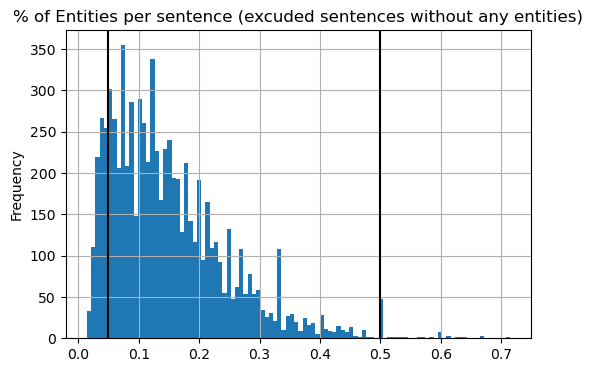

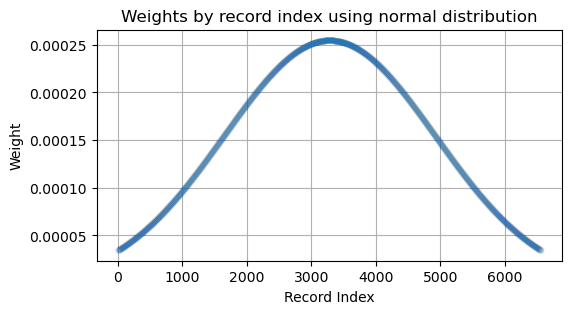

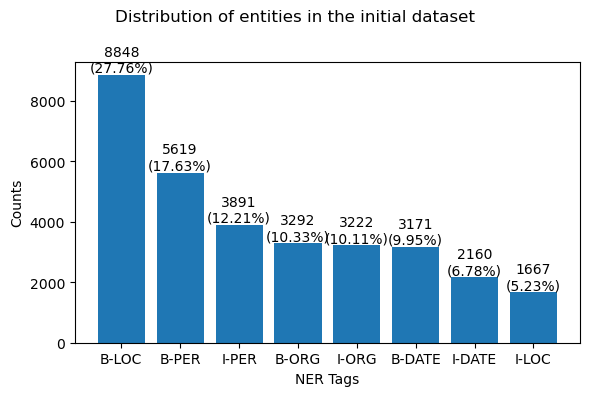

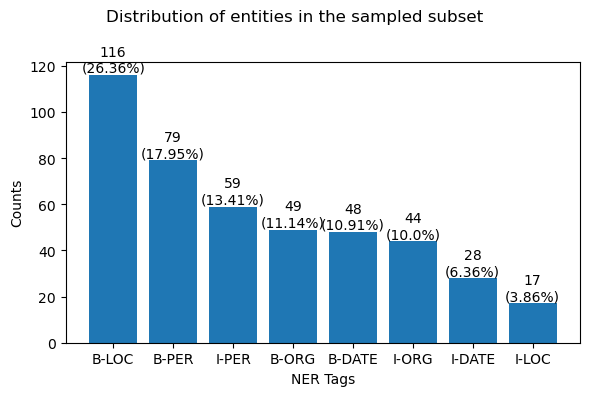

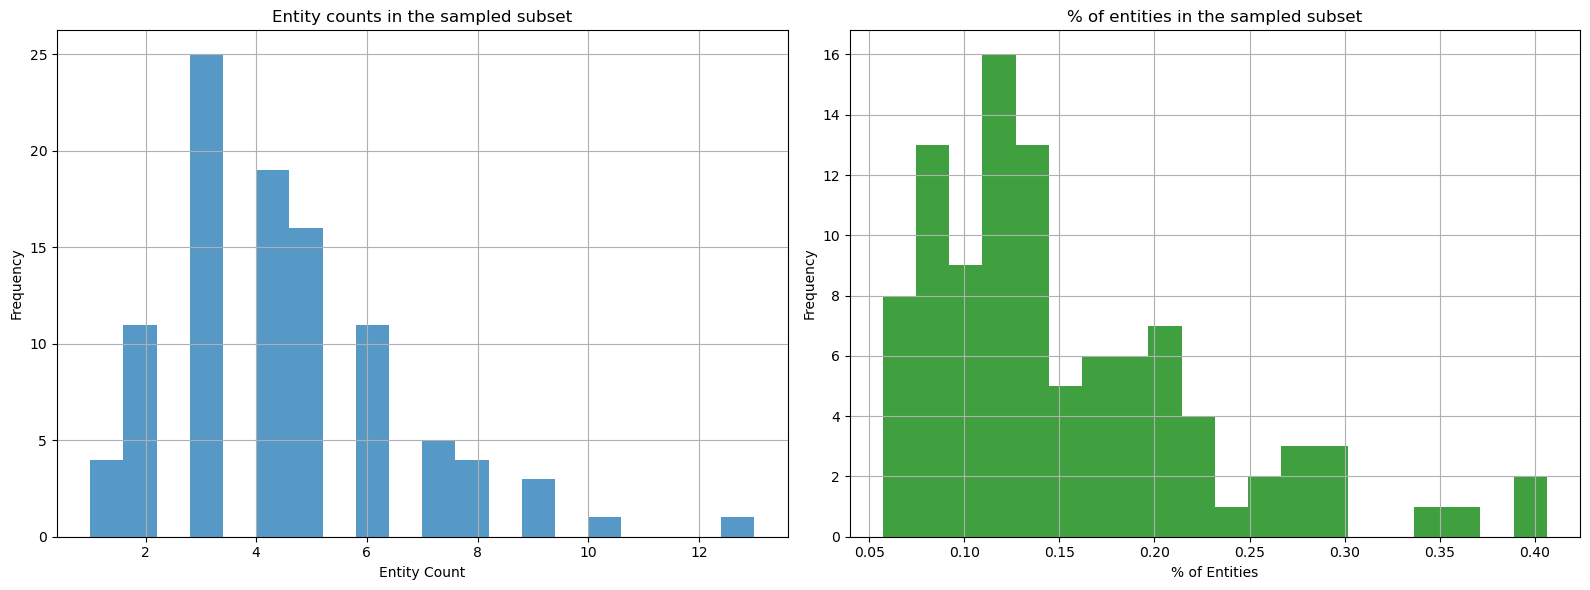

Dataset({
    features: ['id', 'tokens', 'ner_tags', 'entity_count', 'num_labels', '% of entities'],
    num_rows: 100
})

In [21]:
sampled_subset = sample_for_model_selection(data, label_mapping, n_samples=100, verbose=True)
sampled_subset